<a href="https://colab.research.google.com/github/Diwash17/5CS037_2407736_2024_Diwash_Adhikari/blob/main/DiwashAdhikari_worksheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
student_data = pd.read_csv('/content/student.csv')
student_data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [4]:
student_data.tail()

,Math,Reading,Writing
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78
999,66,66,72


In [5]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [7]:
student_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Math,1000.0,67.290,15.085008,13.0,58.00,68.0,78.0,100.0
Reading,1000.0,69.872,14.657027,19.0,60.75,70.0,81.0,100.0
Writing,1000.0,68.616,15.241287,14.0,58.00,69.5,79.0,100.0


In [16]:
X = student_data[['Math', 'Reading']].values
Y = student_data['Writing'].values
X,Y

(array([[48, 68],
        [62, 81],
        [79, 80],
        ...,
        [89, 87],
        [83, 82],
        [66, 66]]),
 array([ 63,  72,  78,  79,  62,  85,  83,  41,  80,  77,  64,  90,  45,
         77,  70,  46,  76,  44,  85,  72,  53,  66,  75,  49,  84,  83,
         68,  66,  77,  78,  74,  83,  72,  65,  46,  66,  50,  79,  68,
         46,  86,  70,  61,  53,  72,  75,  50,  77, 100,  81, 100,  87,
         78,  48,  50,  44,  48,  43,  67,  78,  58,  91,  92,  78,  42,
         85,  73,  83,  61,  58,  60,  55,  48,  62,  68,  59,  62,  48,
         74,  63,  80,  79,  73,  79,  45,  67,  89,  77,  81,  88,  53,
         68,  79,  77,  63,  73,  60,  67, 100,  79,  26,  51,  80,  57,
         41,  78,  68,  49,  76,  41,  71,  77,  89,  86,  55,  80,  56,
         74,  85,  80,  73,  74,  86,  56,  53,  44,  41,  59,  71,  81,
         74,  78,  67,  53,  56,  75,  82,  79,  99,  76,  59,  96,  75,
         61,  56,  88,  65, 100,  79,  55,  61,  83,  74,  59,  54,  47,
 

In [17]:
def train_test_split_manual(X, Y, test_size=0.3):
    n = len(X)
    split_index = int(n * (1 - test_size))
    indices = np.random.permutation(n)
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    Y_train, Y_test = Y[indices[:split_index]], Y[indices[split_index:]]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = train_test_split_manual(X, Y)

In [20]:
def cost_function(X, Y, W):
  """ Parameters:
This function finds the Mean Square Error.
Input parameters:
X: Feature Matrix
Y: Target Matrix
W: Weight Matrix
Output Parameters:
cost: accumulated mean square error.
"""
  m = len(Y)
  Y_pred = np.dot(X, W)
  cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)
  return cost

In [22]:
X_test = np.array([[1, 2], [3, 4], [5, 6]])
Y_test = np.array([3, 7, 11])
W_test = np.array([1, 1])
cost = cost_function(X_test, Y_test, W_test)
if cost == 0:
  print("Proceed Further")
else:
  print("something went wrong: Reimplement a cost function")
print("Cost function output:", cost_function(X_test, Y_test, W_test))

Proceed Further
Cost function output: 0.0


In [25]:
def gradient_descent(X, Y, W, alpha, iterations):
  '''Perform gradient descent to optimize the parameters of a linear regression model.
Parameters:
X (numpy.ndarray): Feature matrix (m x n).
Y (numpy.ndarray): Target vector (m x 1).
W (numpy.ndarray): Initial guess for parameters (n x 1).
alpha (float): Learning rate.
iterations (int): Number of iterations for gradient descent.
Returns:
tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values
.
W_update (numpy.ndarray): Updated parameters (n x 1).
cost_history (list): History of cost values over iterations.
'''
  m = len(Y) # Corrected indentation: This line should be aligned with the function definition.
  cost_history = []
  for _ in range(iterations):
      Y_pred = np.dot(X, W)
      loss = Y_pred - Y
      gradient = (1 / m) * np.dot(X.T, loss)
      W -= alpha * gradient
      cost_history.append(cost_function(X, Y, W))
  return W, cost_history

In [26]:
# Generate random test data
np.random.seed(0) # For reproducibility
X = np.random.rand(100, 3) # 100 samples, 3 features
Y = np.random.rand(100)
W = np.random.rand(3) # Initial guess for parameters
# Set hyperparameters
alpha = 0.01
iterations = 1000
# Test the gradient_descent function
final_params, cost_history = gradient_descent(X, Y, W, alpha, iterations)
# Print the final parameters and cost history
print("Final Parameters:", final_params)
print("Cost History:", cost_history)

Final Parameters: [0.20551667 0.54295081 0.10388027]
Cost History: [0.10711197094660153, 0.10634880599939901, 0.10559826315680618, 0.10486012948320558, 0.1041341956428534, 0.10342025583900626, 0.1027181077540776, 0.1020275524908062, 0.10134839451441931, 0.1006804415957737, 0.1000235047554587, 0.09937739820884377, 0.09874193931205609, 0.09811694850887098, 0.09750224927850094, 0.0968976680842672, 0.09630303432313951, 0.09571818027612913, 0.09514294105952065, 0.09457715457692842, 0.09402066147216397, 0.09347330508290017, 0.09293493139511913, 0.09240538899833017, 0.09188452904154543, 0.0913722051899995, 0.09086827358260123, 0.09037259279010502, 0.08988502377398919, 0.08940542984603007, 0.08893367662855953, 0.08846963201539432, 0.08801316613342668, 0.08756415130486386, 0.08712246201010665, 0.08668797485125508, 0.08626056851623207, 0.08584012374351278, 0.08542652328745133, 0.08501965188419301, 0.0846193962181636, 0.08422564488912489, 0.08383828837978763, 0.08345721902397185, 0.08308233097530

In [27]:
def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y - Y_pred) ** 2))

In [28]:
def r2(Y, Y_pred):
    ss_res = np.sum((Y - Y_pred) ** 2)
    ss_tot = np.sum((Y - np.mean(Y)) ** 2)
    return 1 - (ss_res / ss_tot)

In [29]:
def main():
    # Add a bias term (intercept) to the feature matrix
    X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

    # Initialize weights, learning rate, and iterations
    W = np.zeros(X_train_with_bias.shape[1])
    alpha = 0.0001
    iterations = 1000

    # Train model using gradient descent
    W_optimal, cost_history = gradient_descent(X_train_with_bias, Y_train, W, alpha, iterations)

    # Make predictions
    Y_pred_train = np.dot(X_train_with_bias, W_optimal)
    Y_pred_test = np.dot(X_test_with_bias, W_optimal)

    # Evaluate the model
    train_rmse = rmse(Y_train, Y_pred_train)
    test_rmse = rmse(Y_test, Y_pred_test)
    train_r2 = r2(Y_train, Y_pred_train)
    test_r2 = r2(Y_test, Y_pred_test)

    # Print results
    print("Final Weights (including bias):", W_optimal)
    print("Train RMSE:", train_rmse)
    print("Test RMSE:", test_rmse)
    print("Train R²:", train_r2)
    print("Test R²:", test_r2)


In [30]:
if __name__ == "__main__":
    main()

Final Weights (including bias): [0.00362681 0.10626079 0.88031764]
Train RMSE: 4.534136376982866
Test RMSE: 3.5638583557582804
Train R²: 0.908984231578314
Test R²: -0.19072684811638574


This model overfits because this model performs well on the training data but poorly on the test data.

<ipython-input-20-cbfe03ddaeac>:13: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)
<ipython-input-25-1d465dbb4352>:21: RuntimeWarning: invalid value encountered in subtract
  W -= alpha * gradient
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


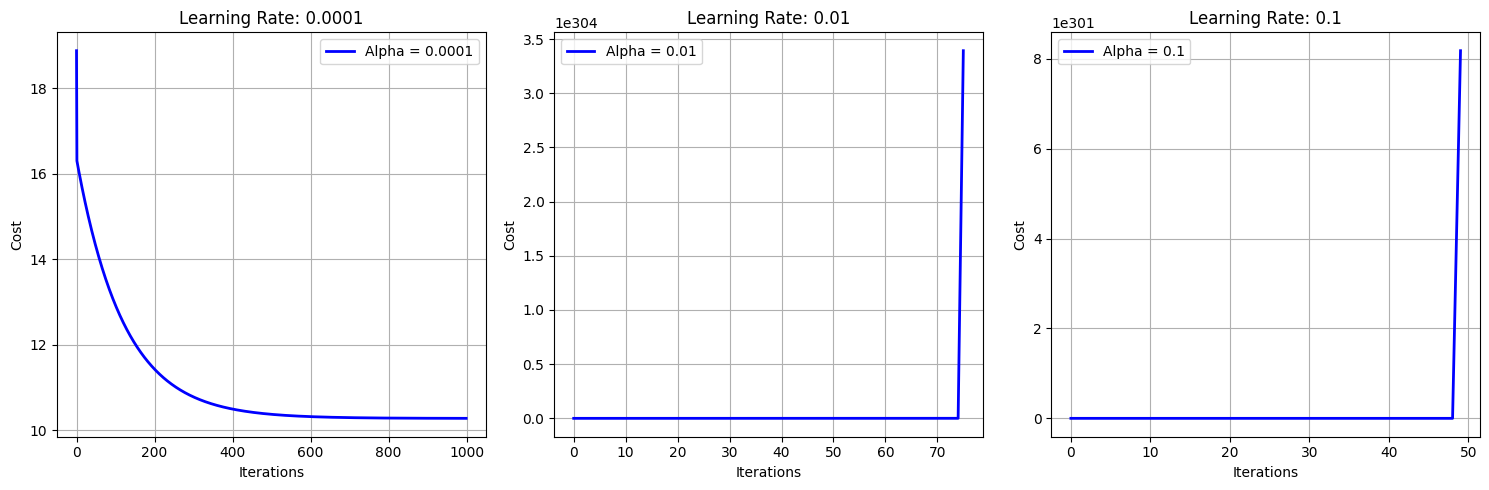

In [36]:
alphas = [0.0001, 0.01, 0.1]
cost_histories = []

for alpha in alphas:
    W_initial = np.zeros(X_train.shape[1])
    _, cost_history = gradient_descent(X_train, Y_train, W_initial, alpha, iterations=1000)
    cost_histories.append(cost_history)

fig, axes = plt.subplots(1, len(alphas), figsize=(15, 5))

for i, alpha in enumerate(alphas):
    axes[i].plot(cost_histories[i], label=f'Alpha = {alpha}', color='b', linewidth=2)
    axes[i].set_title(f'Learning Rate: {alpha}')
    axes[i].set_xlabel('Iterations')
    axes[i].set_ylabel('Cost')
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()